## Practical Work 3

### Auther : Fatema Samir Ahmed
### Date : 18/2/2022 --- Last Version ---

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
X = np.linspace(0, 20)
print('X :\n',X)
a = -1
b = 2
Y = a*X + b
print('Y :\n',Y)

X :
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Y :
 [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.4285714

#### Plot your data points. 

<function matplotlib.pyplot.show(*args, **kw)>

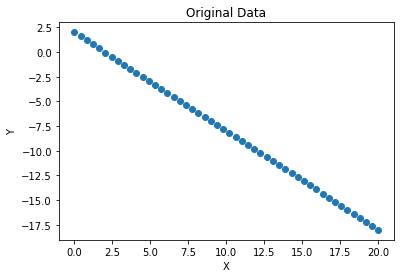

In [4]:
# Draw Original Data 
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
# --- Batch GD for single variable linear regression ---

# defintion Hyposis function 
def H (Theta0, Theta1, X):
    h = Theta0 + Theta1*X
#     print(h)
    return h
# print(H (Theta0, Theta1))


# Define Cost Function
def Cost (Theta_0, Theta_1,X,Y):
    z = H(Theta_0, Theta_1, X) - Y 
    return (z @z )/(2*len(X))


def GD_single( X, Y, alpha, Max_iteration):
    # define Array cost to save All costs
    cost_val = []
    # define Array Y_predict to save All hypothesis output
    Y_predict = []
    
    # define Array Theta0 to save All Theta0
    All_Theta_0 = []
    # define Array Theta1 to save All Theta1
    All_Theta_1 = []
    
    # inilaize Theta_0 and Theta_1 to Zero
    Theta_0, Theta_1 = 0, 0
    epoch = 0
    for i in range(Max_iteration):
        # Append Theta_0 and Theta_1 to save All 
        All_Theta_0.append(Theta_0)
        All_Theta_1.append(Theta_1)
        
        # save Cost 
        cost_val.append(Cost(Theta_0, Theta_1,X,Y))
        
        # calc hypothesis
        Y_predict = H(Theta_0, Theta_1, X) # return array
        Z = Y_predict - Y
        GR_theta0  = (np.sum(Z))/ len(X)
        GR_theta1  = (np.sum(Z * X))/ len(X)
        
        # Update Theta0 and Theta1
        Theta_0 = Theta_0 - alpha*GR_theta0
        Theta_1 = Theta_1 - alpha*GR_theta1
        if (abs(cost_val[i]-cost_val[i-1] ) < 0.001 and i>0):
            epoch = i+2
            break
    # save last update
    All_Theta_0.append(Theta_0)
    All_Theta_1.append(Theta_1)
    cost_val.append(Cost(Theta_0, Theta_1,X,Y))
    
    return All_Theta_0, All_Theta_1, cost_val, Y_predict, epoch


In [6]:

alpha = 0.001
iteration = 100
Theta_0_all, Theta_1_all, loss , Y_predict, epochs = GD_single( X, Y, alpha, iteration) 

In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_predict)
print(r2)

0.9688589407729974


In [8]:
print(len(loss),"  number of epochs : ",epochs )

37   number of epochs :  37


#### Plot loss vs. epochs

<function matplotlib.pyplot.show(*args, **kw)>

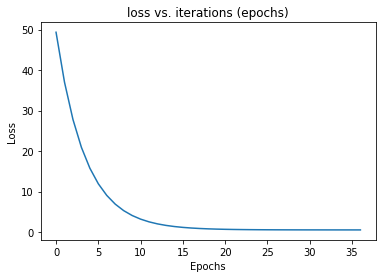

In [9]:
plt.plot( np.arange(epochs),loss)
plt.title('loss vs. iterations (epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

<function matplotlib.pyplot.show(*args, **kw)>

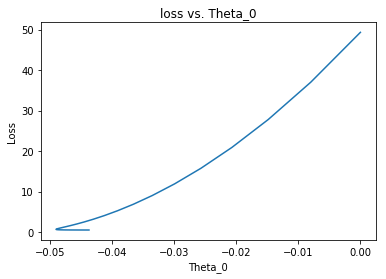

In [10]:
plt.plot(Theta_0_all,loss)
plt.title('loss vs. Theta_0')
plt.ylabel('Loss')
plt.xlabel('Theta_0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

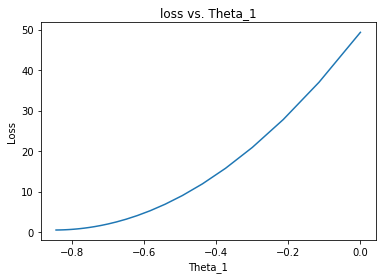

In [11]:
plt.plot(Theta_1_all,loss)
plt.title('loss vs. Theta_1')
plt.ylabel('Loss')
plt.xlabel('Theta_1')
plt.show

#### Plot all regression lines till converge

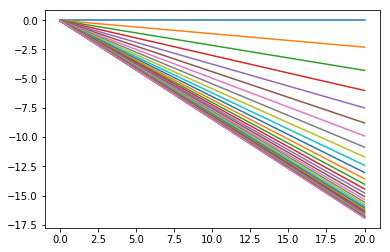

In [15]:
for theta0 , theta1 in zip(Theta_0_all,Theta_1_all):
    y_hat = theta0+ theta1*X
    plt.plot(X,y_hat)

#### Plot the best regression line

<function matplotlib.pyplot.show(*args, **kw)>

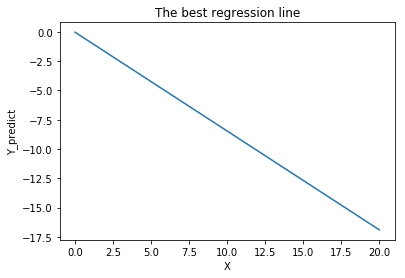

In [16]:

plt.plot(X, Y_predict)
plt.title('The best regression line')
plt.xlabel('X')
plt.ylabel('Y_predict')
plt.show

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

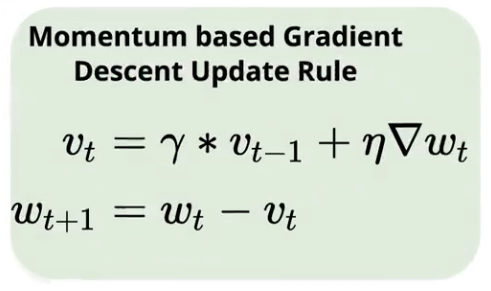

#### γ takes values between 0 and 1.
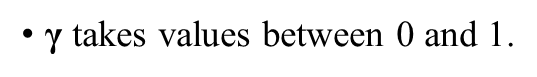

In [53]:
# --- Momentum-Based GD for single variable linear regression ---

# defintion Hyposis function 
def H (Theta0, Theta1, X):
    h = Theta0 + Theta1*X
#     print(h)
    return h


# Define Cost Function
def Cost (Theta_0, Theta_1,X,Y):
    z = H(Theta_0, Theta_1, X) - Y 
    return (z @ z )/(2*len(X))


def Momentum_GD_single( X, Y, alpha, gama, Max_iteration):
    # define Array cost to save All costs
    cost_val = []
    
    # define Array Theta0 to save All Theta0
    All_Theta_0 = []
    # define Array Theta1 to save All Theta1
    All_Theta_1 = []
    
    # inilaize Theta_0 and Theta_1 to Zero
    Theta_0, Theta_1 = 0, 0
    V_0, V_1 = 0, 0
    epoch = 0
    for i in range(Max_iteration):
        # Append Theta_0 and Theta_1 to save All 
        All_Theta_0.append(Theta_0)
        All_Theta_1.append(Theta_1)
        
        # save Cost 
        cost_val.append(Cost(Theta_0, Theta_1,X,Y))
    
        # calc hypothesis
        Y_predict = H(Theta_0, Theta_1, X) # return array
        Z = Y_predict - Y
        GR_theta0  = (np.sum(Z))/ len(X)
        GR_theta1  = (np.sum(Z * X))/ len(X)
        
        # Update veta_0 and veta_1 of momuntum 
        V_0 = gama * V_0 + alpha*GR_theta0
        V_1 = gama * V_1 + alpha*GR_theta1
        
        # Update Theta0 and Theta1
        Theta_0 = Theta_0 - V_0
        Theta_1 = Theta_1 - V_1
        
        if (abs(cost_val[i]-cost_val[i-1] ) < 0.001 and i>0):
            epoch = i+2
            break
    
    # save last update
    All_Theta_0.append(Theta_0)
    All_Theta_1.append(Theta_1)
    cost_val.append(Cost(Theta_0, Theta_1,X,Y))
    
    return All_Theta_0, All_Theta_1, cost_val,  epoch


# Test Momentum-Based GD for single variable

In [63]:
X = np.linspace(0, 20)
print('X :\n',X)
a = -1
b = 2
Y = a*X + b
print('Y :\n',Y)

X :
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Y :
 [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.4285714

In [64]:
gama = 0.5
alpha = 0.001
iteration = 100
Theta_0_Momen, Theta_1_Momen, loss_Momen ,  epo = Momentum_GD_single( X, Y, alpha, gama, iteration) 
Y_hat = Theta_0_Momen[-1] + Theta_1_Momen[-1]*X
print(Y_hat)

[ -0.04407159  -0.39046095  -0.73685031  -1.08323967  -1.42962903
  -1.77601839  -2.12240775  -2.46879711  -2.81518647  -3.16157583
  -3.50796519  -3.85435455  -4.20074391  -4.54713327  -4.89352263
  -5.23991199  -5.58630135  -5.93269071  -6.27908007  -6.62546942
  -6.97185878  -7.31824814  -7.6646375   -8.01102686  -8.35741622
  -8.70380558  -9.05019494  -9.3965843   -9.74297366 -10.08936302
 -10.43575238 -10.78214174 -11.1285311  -11.47492046 -11.82130982
 -12.16769918 -12.51408854 -12.8604779  -13.20686726 -13.55325662
 -13.89964598 -14.24603534 -14.5924247  -14.93881406 -15.28520342
 -15.63159278 -15.97798213 -16.32437149 -16.67076085 -17.01715021]


In [65]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_hat)
print("r2 for Momentum-Based GD ",r2)

r2 for Momentum-Based GD  0.9689791623803647


#### Plot loss vs. epochs for Momentum-Based GD for single variable

<function matplotlib.pyplot.show(*args, **kw)>

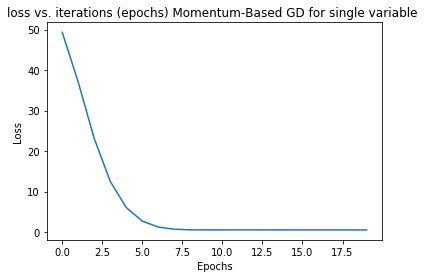

In [66]:
plt.plot( np.arange(epo),loss_Momen)
plt.title('loss vs. iterations (epochs) Momentum-Based GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

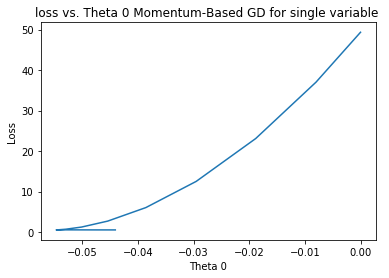

In [67]:
plt.plot(Theta_0_Momen,loss_Momen)
plt.title('loss vs. Theta 0 Momentum-Based GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Theta 0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

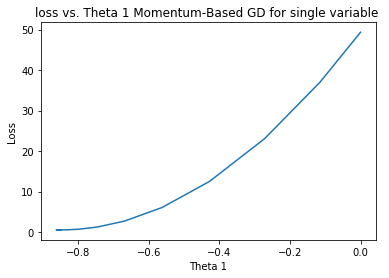

In [68]:
plt.plot(Theta_1_Momen,loss_Momen)
plt.title('loss vs. Theta 1 Momentum-Based GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Theta 1')
plt.show

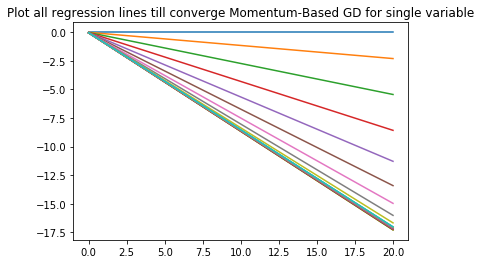

In [69]:
for theta0 , theta1 in zip(Theta_0_Momen,Theta_1_Momen):
    y_hat = H (theta0, theta1, X)
    plt.plot(X,y_hat)
    plt.title('Plot all regression lines till converge Momentum-Based GD for single variable')

<function matplotlib.pyplot.show(*args, **kw)>

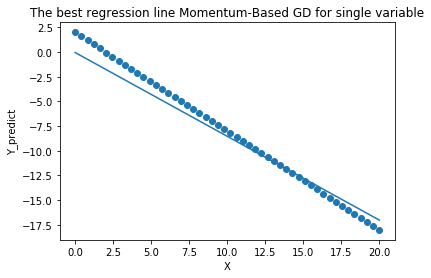

In [70]:
# Draw Original Data 
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show
plt.plot(X, Y_hat)
plt.title('The best regression line Momentum-Based GD for single variable')
plt.xlabel('X')
plt.ylabel('Y_predict')
plt.show

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [18]:
gama = 0
alpha = 0.001
iteration = 100
Theta_0_Momen, Theta_1_Momen, loss_Momen ,  epo = Momentum_GD_single( X, Y, alpha, gama, iteration) 
Y_hat = Theta_0_Momen[-1] + Theta_1_Momen[-1]*X
print(Y_hat)

[ -0.04369626  -0.38796823  -0.73224021  -1.07651218  -1.42078416
  -1.76505613  -2.10932811  -2.45360008  -2.79787206  -3.14214403
  -3.48641601  -3.83068798  -4.17495996  -4.51923193  -4.86350391
  -5.20777588  -5.55204786  -5.89631983  -6.24059181  -6.58486378
  -6.92913576  -7.27340773  -7.61767971  -7.96195168  -8.30622366
  -8.65049563  -8.99476761  -9.33903958  -9.68331156 -10.02758353
 -10.37185551 -10.71612748 -11.06039946 -11.40467143 -11.74894341
 -12.09321538 -12.43748736 -12.78175933 -13.12603131 -13.47030328
 -13.81457526 -14.15884723 -14.50311921 -14.84739118 -15.19166316
 -15.53593513 -15.88020711 -16.22447908 -16.56875106 -16.91302303]


In [20]:

from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_hat)
print("R2 Momentum-Based GD with momentum = 0",r2)

R2 Momentum-Based GD with momentum = 0 0.9689015837651472


<function matplotlib.pyplot.show(*args, **kw)>

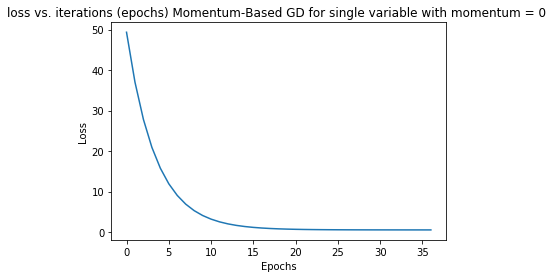

In [21]:
plt.plot( np.arange(epo),loss_Momen)
plt.title('loss vs. iterations (epochs) Momentum-Based GD for single variable with momentum = 0 ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

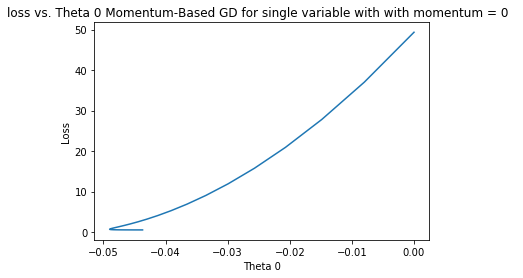

In [22]:
plt.plot(Theta_0_Momen,loss_Momen)
plt.title('loss vs. Theta 0 Momentum-Based GD for single variable with with momentum = 0  ')
plt.ylabel('Loss')
plt.xlabel('Theta 0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

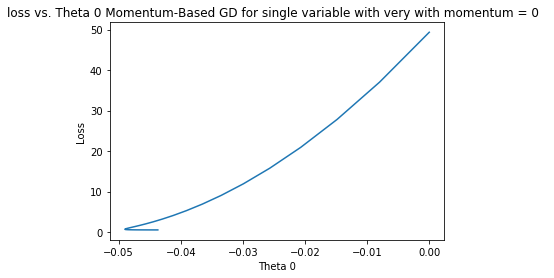

In [23]:
plt.plot(Theta_0_Momen,loss_Momen)
plt.title('loss vs. Theta 0 Momentum-Based GD for single variable with very with momentum = 0  ')
plt.ylabel('Loss')
plt.xlabel('Theta 0')
plt.show

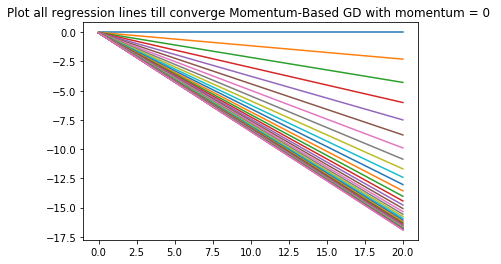

In [24]:
for theta0 , theta1 in zip(Theta_0_Momen,Theta_1_Momen):
    y_hat = H (theta0, theta1, X)
    plt.plot(X,y_hat)
    plt.title('Plot all regression lines till converge Momentum-Based GD with momentum = 0 ')

In [27]:
gama = 0.97
alpha = 0.001
iteration = 100
Theta_0_Momen, Theta_1_Momen, loss_Momen ,  epo = Momentum_GD_single( X, Y, alpha, gama, iteration) 
Y_hat = Theta_0_Momen[-1] + Theta_1_Momen[-1]*X
print(Y_hat)
print(len(Theta_0_Momen))

[  0.97741322   0.67376574   0.37011826   0.06647079  -0.23717669
  -0.54082417  -0.84447165  -1.14811912  -1.4517666   -1.75541408
  -2.05906156  -2.36270903  -2.66635651  -2.97000399  -3.27365147
  -3.57729894  -3.88094642  -4.1845939   -4.48824137  -4.79188885
  -5.09553633  -5.39918381  -5.70283128  -6.00647876  -6.31012624
  -6.61377372  -6.91742119  -7.22106867  -7.52471615  -7.82836363
  -8.1320111   -8.43565858  -8.73930606  -9.04295354  -9.34660101
  -9.65024849  -9.95389597 -10.25754345 -10.56119092 -10.8648384
 -11.16848588 -11.47213336 -11.77578083 -12.07942831 -12.38307579
 -12.68672326 -12.99037074 -13.29401822 -13.5976657  -13.90131317]
101


In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_hat)
print("r2_score : ",r2)
print(len(Theta_1_Momen))
print(len(loss_Momen),'\n',epo) # whey number of epoch = 0 ?!!!!!!!!!!!

r2_score :  0.8662465118287216
101
101 
 0


<function matplotlib.pyplot.show(*args, **kw)>

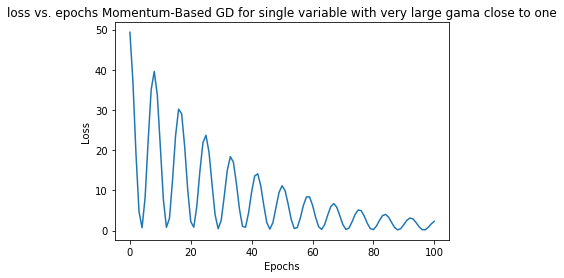

In [30]:
plt.plot( np.arange(101), loss_Momen)
plt.title('loss vs. epochs Momentum-Based GD for single variable with very large gama close to one')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

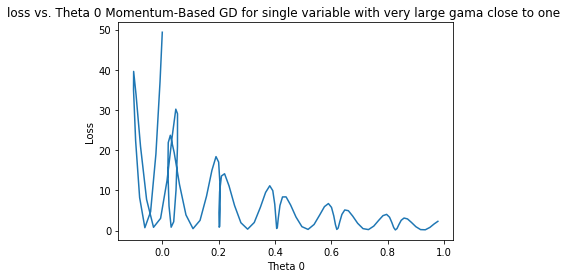

In [31]:
plt.plot(Theta_0_Momen,loss_Momen)
plt.title('loss vs. Theta 0 Momentum-Based GD for single variable with very large gama close to one ')
plt.ylabel('Loss')
plt.xlabel('Theta 0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

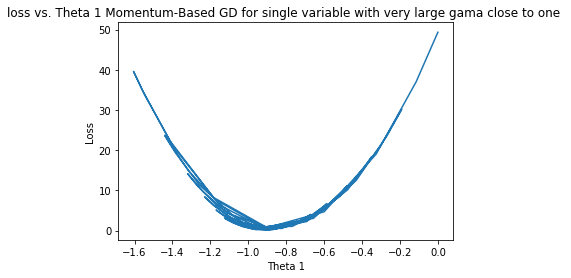

In [32]:
plt.plot(Theta_1_Momen,loss_Momen)
plt.title('loss vs. Theta 1 Momentum-Based GD for single variable with very large gama close to one ')
plt.ylabel('Loss')
plt.xlabel('Theta 1')
plt.show

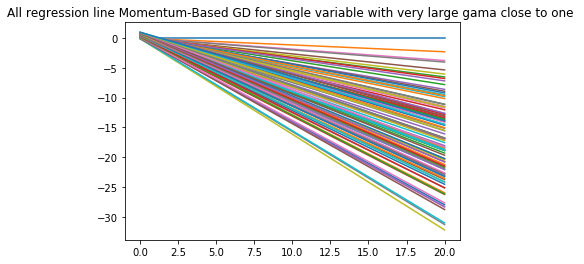

In [37]:
for theta0 , theta1 in zip(Theta_0_Momen,Theta_1_Momen):
    y_hat = theta0 + theta1*X
    plt.plot(X,y_hat)
    plt.title('All regression line Momentum-Based GD for single variable with very large gama close to one ')

<function matplotlib.pyplot.show(*args, **kw)>

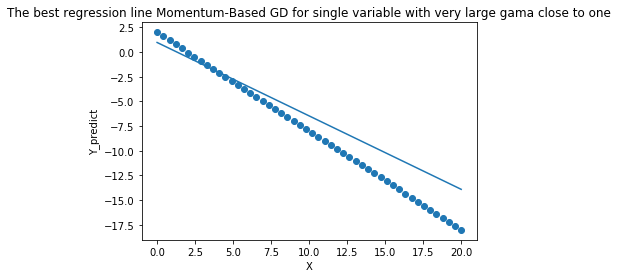

In [35]:
# Draw Original Data 
plt.scatter(X,Y)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show
plt.plot(X, Y_hat)
plt.title('The best regression line Momentum-Based GD for single variable with very large gama close to one')
plt.xlabel('X')
plt.ylabel('Y_predict')
plt.show

### Update your Batch GD for one variable  implementation to be NAG and check your results

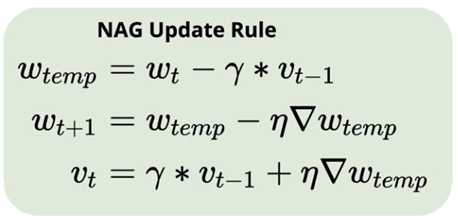

In [2]:
# --- NAG GD for single variable linear regression ---

# defintion Hyposis function 
def H (Theta0, Theta1, X):
    h = Theta0 + Theta1*X
#     print(h)
    return h


# Define Cost Function
def Cost (Theta_0, Theta_1,X,Y):
    z = H(Theta_0, Theta_1, X) - Y 
    return (z @ z )/(2*len(X))


def NAG_GD_single( X, Y, alpha, gama, Max_iteration):
    # define Array cost to save All costs
    cost_val = []
    
    # define Array Theta0 to save All Theta0
    All_Theta_0 = []
    # define Array Theta1 to save All Theta1
    All_Theta_1 = []
    
    # inilaize Theta_0 and Theta_1 to Zero
    Theta_0, Theta_1 = 0, 0
    V_0, V_1 = 0, 0
    epoch = 0
    for i in range(Max_iteration):
        # Append Theta_0 and Theta_1 to save All 
        All_Theta_0.append(Theta_0)
        All_Theta_1.append(Theta_1)
        
        # save Cost 
        cost_val.append(Cost(Theta_0, Theta_1,X,Y))
    

        
        # Update veta_0 and veta_1 and theta_temp of NAG 
        theta_temp_0 = Theta_0 - gama*V_0
        theta_temp_0 = Theta_1 - gama*V_1
        
         # calc Grediand theta_temp
        Z = H(theta_temp_0, theta_temp_0, X) - Y
        GR_theta_temp_0  = (np.sum(Z))/ len(X)
        GR_theta_temp_1  = (np.sum(Z * X))/ len(X)
        
        # Update Theta0 and Theta1
        Theta_0 = Theta_0 - alpha*GR_theta_temp_0
        Theta_1 = Theta_1 - alpha*GR_theta_temp_1
        
        V_0 = gama * V_0 + alpha*GR_theta_temp_0
        V_1 = gama * V_1 + alpha*GR_theta_temp_1
        

        
        if (abs(cost_val[i]-cost_val[i-1] ) < 0.001 and i>0):
            epoch = i+2
            break
    # save last update
    All_Theta_0.append(Theta_0)
    All_Theta_1.append(Theta_1)
    cost_val.append(Cost(Theta_0, Theta_1,X,Y))
    
    return All_Theta_0, All_Theta_1, cost_val,  epoch


# Test NAG GD for single variable

In [5]:
X_Nag = np.linspace(0, 20)
print('X :\n',X_Nag)
a = -1
b = 2
Y_Nag = a*X_Nag + b
print('Y :\n',Y_Nag)


X :
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
Y :
 [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.4285714

In [6]:
gama = 0.5
alpha = 0.001
iteration = 100
Theta_0_Nag, Theta_1_Nag, loss_Nag ,  epo_Nag = NAG_GD_single( X_Nag, Y_Nag, alpha, gama, iteration) 
Y_hat_Nag = Theta_0_Nag[-1] + Theta_1_Nag[-1]*X_Nag
print(Y_hat_Nag)

[ -0.0220765   -0.34529213  -0.66850775  -0.99172338  -1.314939
  -1.63815463  -1.96137026  -2.28458588  -2.60780151  -2.93101713
  -3.25423276  -3.57744838  -3.90066401  -4.22387964  -4.54709526
  -4.87031089  -5.19352651  -5.51674214  -5.83995776  -6.16317339
  -6.48638902  -6.80960464  -7.13282027  -7.45603589  -7.77925152
  -8.10246714  -8.42568277  -8.7488984   -9.07211402  -9.39532965
  -9.71854527 -10.0417609  -10.36497653 -10.68819215 -11.01140778
 -11.3346234  -11.65783903 -11.98105465 -12.30427028 -12.62748591
 -12.95070153 -13.27391716 -13.59713278 -13.92034841 -14.24356403
 -14.56677966 -14.88999529 -15.21321091 -15.53642654 -15.85964216]


In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_Nag,Y_hat_Nag)
print("r2_score NAG GD : ",r2)

r2_score NAG GD :  0.9565845372305869


<function matplotlib.pyplot.show(*args, **kw)>

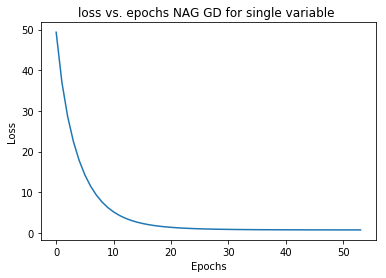

In [8]:
plt.plot( np.arange(epo_Nag), loss_Nag)
plt.title('loss vs. epochs NAG GD for single variable ')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

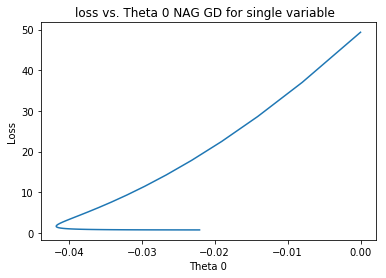

In [9]:
plt.plot(Theta_0_Nag,loss_Nag)
plt.title('loss vs. Theta 0 NAG GD for single variable  ')
plt.ylabel('Loss')
plt.xlabel('Theta 0')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

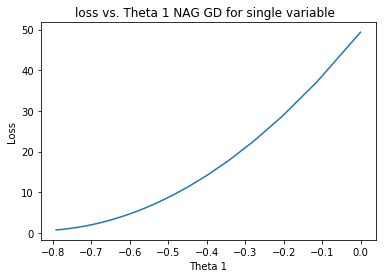

In [10]:
plt.plot(Theta_1_Nag,loss_Nag)
plt.title('loss vs. Theta 1 NAG GD for single variable  ')
plt.ylabel('Loss')
plt.xlabel('Theta 1')
plt.show

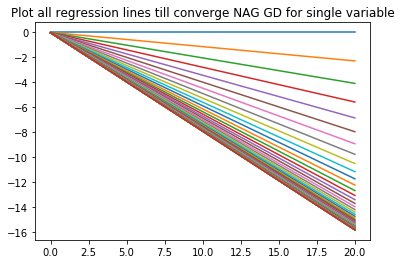

In [12]:
for theta0 , theta1 in zip(Theta_0_Nag,Theta_1_Nag):
    y_hat = H (theta0, theta1, X_Nag)
    plt.plot(X_Nag,y_hat)
    plt.title('Plot all regression lines till converge NAG GD for single variable')

<function matplotlib.pyplot.show(*args, **kw)>

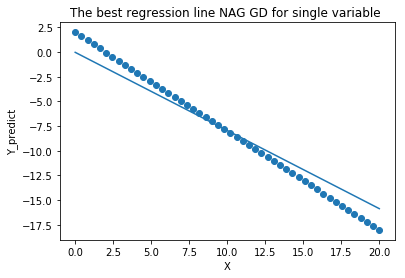

In [13]:
# Draw Original Data 
plt.scatter(X_Nag, Y_Nag)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show
plt.plot(X_Nag, Y_hat_Nag)
plt.title('The best regression line NAG GD for single variable ')
plt.xlabel('X')
plt.ylabel('Y_predict')
plt.show

## Congratulations 
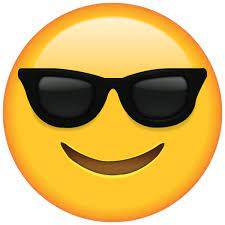

# OHHHHHHHH, Finally " Thanks God "
Fatema is Good don't wory :)

In [9]:
import numpy as np
rng = np.random.RandomState(1)
X = 5 * rng.rand(50, 1)
y = 6 + 2 * X + np.random.randn(50, 1)
y

array([[ 8.9318389 ],
       [13.23017265],
       [ 6.72525972],
       [ 8.85619339],
       [ 6.67683826],
       [ 5.65563913],
       [ 7.76830651],
       [ 9.12065735],
       [ 9.61129756],
       [13.52372471],
       [10.75674271],
       [13.20929486],
       [ 8.2968864 ],
       [15.35668069],
       [ 6.05175976],
       [12.36719757],
       [ 9.81835606],
       [11.20612329],
       [ 8.6159002 ],
       [ 7.8882541 ],
       [13.04820829],
       [13.91665307],
       [10.42996619],
       [13.19793686],
       [13.92871716],
       [14.78267726],
       [ 6.31985025],
       [ 6.84578845],
       [ 6.67346993],
       [15.27808478],
       [ 6.23825899],
       [11.84395964],
       [14.77036569],
       [12.40322136],
       [12.36931932],
       [ 8.47086582],
       [11.71090685],
       [15.92792184],
       [ 5.57688487],
       [13.65497969],
       [13.73872459],
       [11.53337399],
       [ 8.73346648],
       [13.95143832],
       [ 6.75167272],
       [11

In [10]:
print(X)

[[2.08511002e+00]
 [3.60162247e+00]
 [5.71874087e-04]
 [1.51166286e+00]
 [7.33779454e-01]
 [4.61692974e-01]
 [9.31301057e-01]
 [1.72780364e+00]
 [1.98383737e+00]
 [2.69408367e+00]
 [2.09597257e+00]
 [3.42609750e+00]
 [1.02226125e+00]
 [4.39058718e+00]
 [1.36937966e-01]
 [3.35233755e+00]
 [2.08652401e+00]
 [2.79344914e+00]
 [7.01934693e-01]
 [9.90507445e-01]
 [4.00372284e+00]
 [4.84130788e+00]
 [1.56712089e+00]
 [3.46161308e+00]
 [4.38194576e+00]
 [4.47303332e+00]
 [4.25221057e-01]
 [1.95273916e-01]
 [8.49152098e-01]
 [4.39071252e+00]
 [4.91734169e-01]
 [2.10553813e+00]
 [4.78944765e+00]
 [2.66582642e+00]
 [3.45938557e+00]
 [1.57757816e+00]
 [3.43250464e+00]
 [4.17312836e+00]
 [9.14413867e-02]
 [3.75072157e+00]
 [4.94430544e+00]
 [3.74082827e+00]
 [1.40221996e+00]
 [3.94639664e+00]
 [5.16130033e-01]
 [2.23946763e+00]
 [4.54297752e+00]
 [1.46807074e+00]
 [1.43887669e+00]
 [6.50142861e-01]]


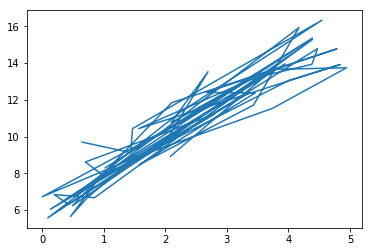

In [12]:
import matplotlib.pyplot as plt
plt.plot(X,y)